## Importance of Weight Initialization during training of Neural Networks

Training a neural network completely depends upon the type of parameters used to initialize the network. If the initialization of parameters is done correctly, the optimization or the result will be achieved in minimal time and if not initialized properly will lead to problems. In simple words, the performance of the neural network depends on how its parameters are initialized when it is starting to train. If we train a neural network with random weights, then the output becomes non-reproducible. On the other hand, if we train the neural network with constantly valued weights, then it would consume a lot of time to converge. In this, we will compare the accuracy of all the keras initializers and also look at the visualization as well. Snippets of the code have been displayed here because the visualization was done on wandb. Adding to it the model was trained for 20 epochs and dataset chosen was MNIST dataset. 

Consider upvoting if it helps you!

**Data and Model**

To visualize and understand the performance level of the initializers, I have used the MNIST dataset. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

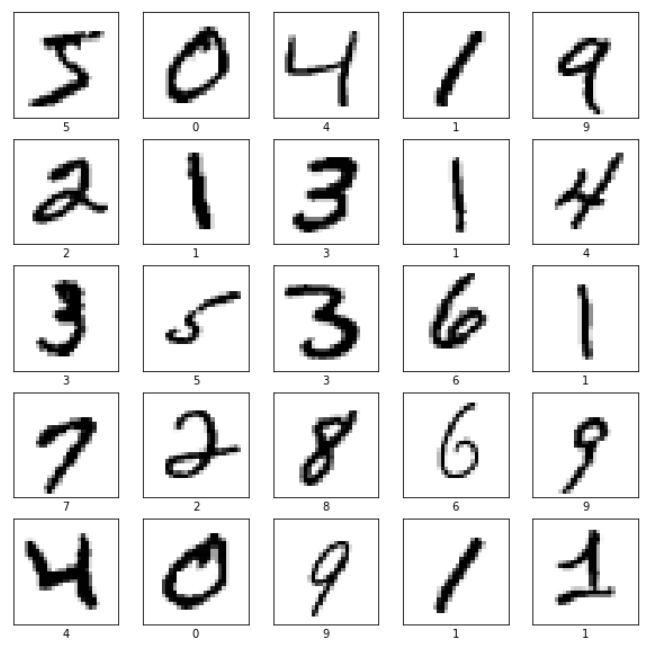

The model architecture used to train is the following:

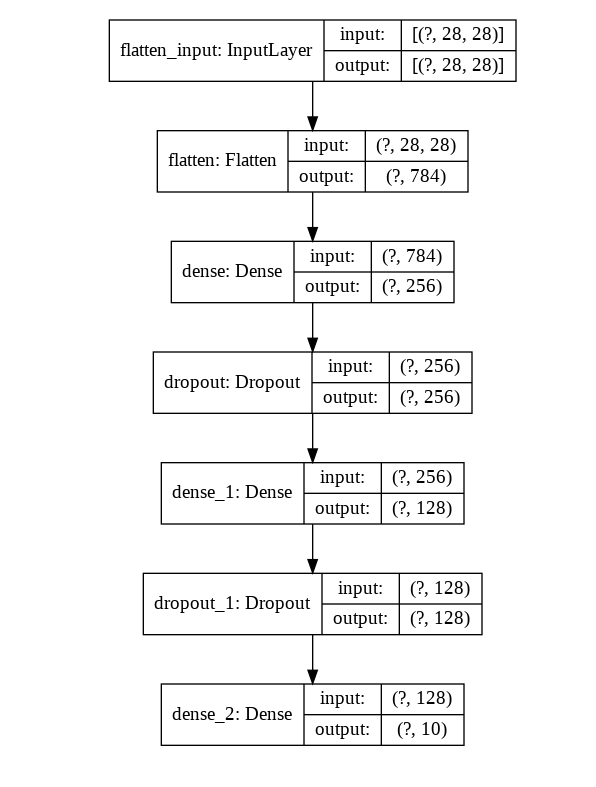

The final Dense layer has a shape of (10, ) and a softmax activation function as it would give us the probability of 10 different classes that is from 0–9. The model architecture will remain the same for all the initializers which will be used for experimental purposes. Adam and sparse_categorical_crossentropy will be used as optimizer and loss function respectively. The model was trained for a total of 20 epochs.

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Gather data and preprocess it
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
CLASS_NAMES = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[y_train[i]])
plt.show()

In [ ]:
#!pip install wandb
import wandb

In [ ]:
from wandb.keras import WandbCallback

In [ ]:
def training(init_scheme):
    if isinstance(init_scheme, str):
        wandb.init(project='weight-initialization-tb', sync_tensorboard=True,
                   id=init_scheme)
    else:
        wandb.init(project='weight-initialization-tb', sync_tensorboard=True,
                   id=str(init_scheme))
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer=init_scheme,
            bias_initializer='zeros'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu', kernel_initializer=init_scheme,
            bias_initializer='zeros'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init_scheme,
            bias_initializer='zeros')
    ])

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    return model, wandb.run.dir

### Zeros  

In this method, all the weights associated with the input are assigned to be zero. Hence, the derivative with respective to the loss function is the same for every weight in each iteration. It is then similar to a linear model.

In [ ]:
model_w_zeros, run_dir = training(init_scheme='zeros')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

model_w_zeros.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

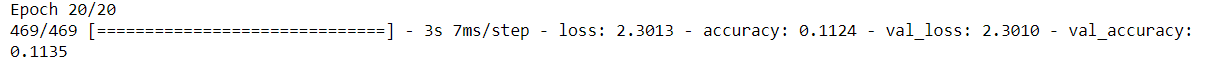

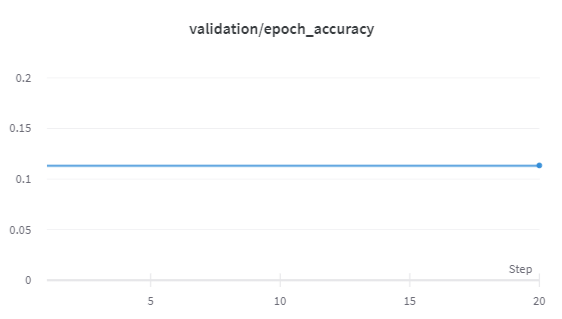

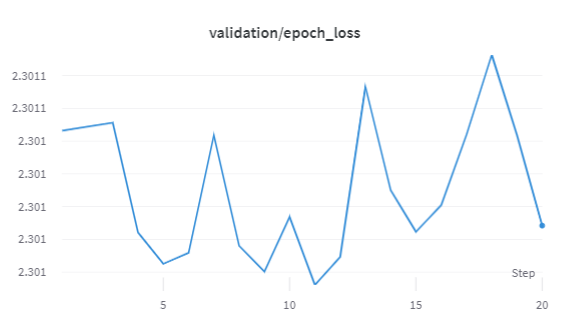

### Ones

In this method, all the weights associated with the input are assigned to one but it is still comparatively better than assigning weights to zero because the product of WiXi is not zero as Wi’s are not zero in this method.

In [ ]:
model_w_ones, run_dir = training(init_scheme='ones')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

model_w_ones.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

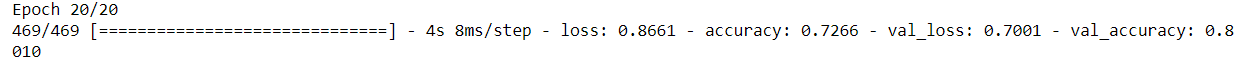

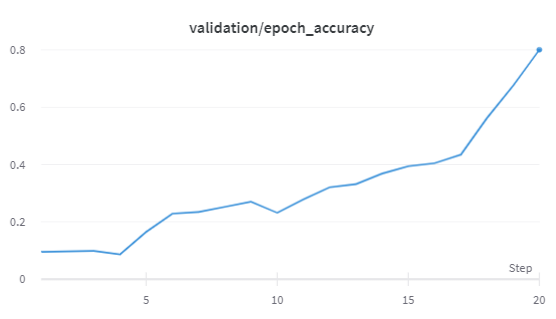

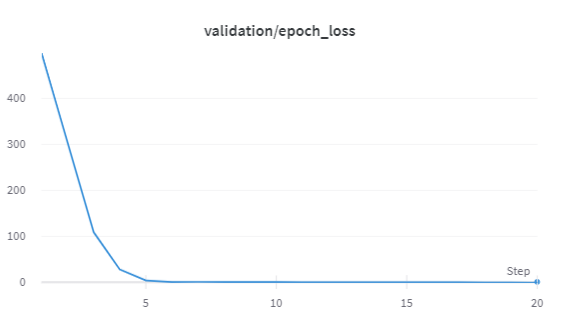

### Orthogonal

Orthogonal initialization proves really beneficial in optimizing deep neural networks. It speeds up the convergence relative to the standard Gaussian initialization. For deep neural networks, the width needed for efficient convergence to a global minimum with orthogonal initialization is independent of the depth. It generates a random orthogonal matrix at the time of its execution. Orthogonal initializer returns a tensor that if multiplied by its transpose, gives an identity tensor.<br>
Arguments:
* gain: Multiplicative factor to apply to the orthogonal matrix.
* seed: A Python integer. Used to seed the random generator.

In [ ]:
Orthogonal, run_dir = training(init_scheme='Orthogonal')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

Orthogonal.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

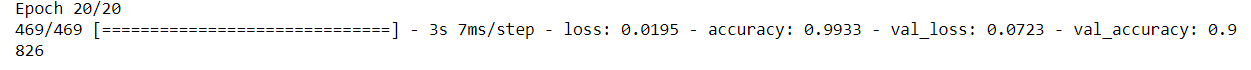

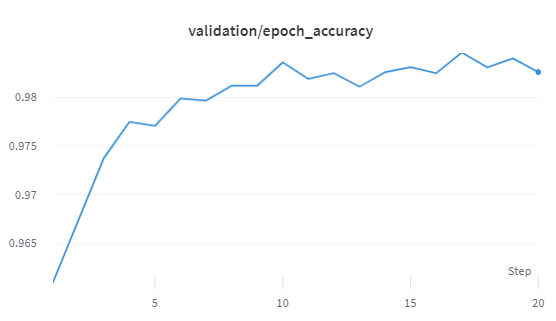

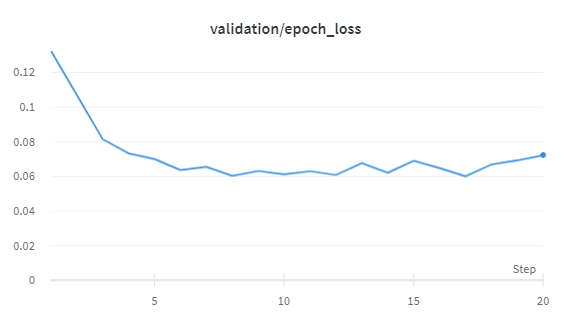

### Identity

Identity initializer returns a tensor with 0’s everywhere except for 1’s at the diagonal. It is only used for 2D matrices.<br>
Arguments:
* gain: Multiplicative factor to apply to the identity matrix.
* dtype: The type of the output.

In [ ]:
Identity, run_dir = training(init_scheme='Identity')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

Identity.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

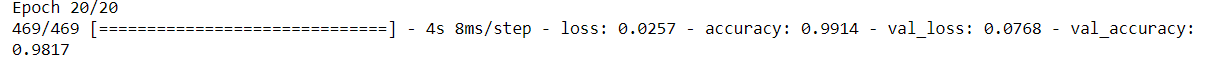

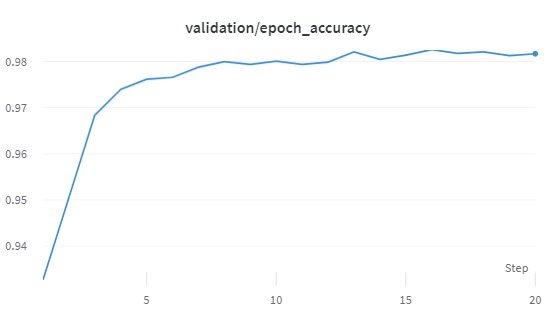

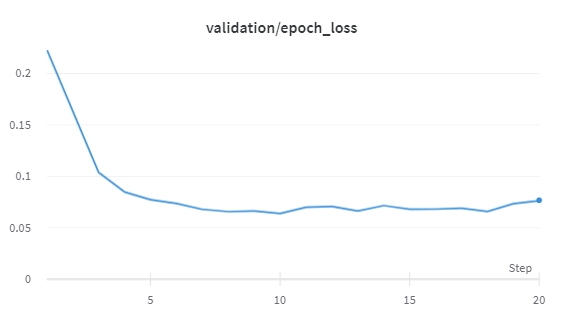

### Random Normal 

Assigning random weight values is better than assigning ones or zeros as weight values as we saw earlier the accuracy of one and zero initializers being reasonably low. On the other hand, if randomly initialized weight values are very high or very low then it may lead to problems known as exploding gradients and vanishing gradients respectively.<br>
In this method, the initializer generates tensors with a normal distribution.<br>
Arguments:
* mean: a python scalar or a scalar-tensor. Mean of the random values to generate.
* stddev: a python scalar or a scalar-tensor. The standard deviation of the random values to generate.
* seed: A Python integer. Used to seed the random generator.


In [ ]:
rand_normal, run_dir = training(init_scheme='RandomNormal')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

rand_normal.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

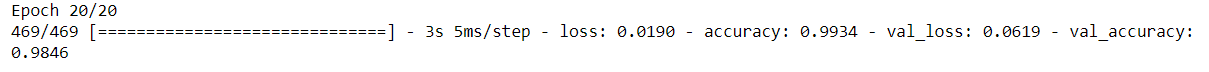

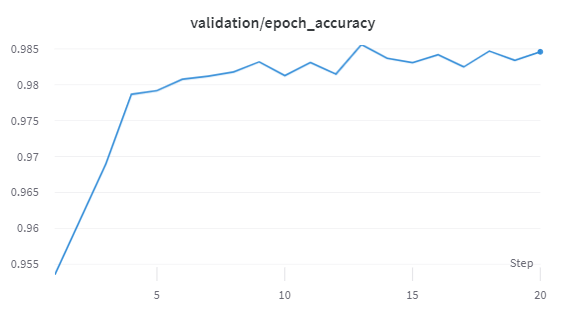

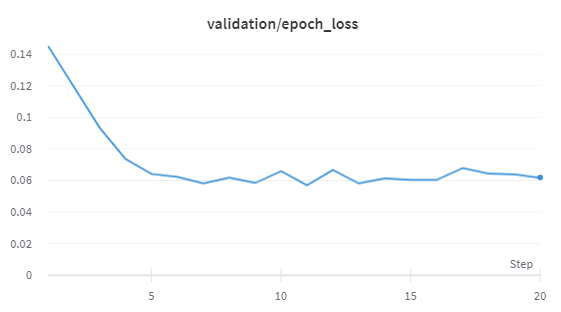

### Random Uniform 

In this method, the initializer generates tensors with a uniform distribution.<br>
Arguments:
* minval: A python scalar or a scalar-tensor. Lower bound of the range of random values to generate.
* maxval: A python scalar or a scalar-tensor. Upper bound of the range of random values to generate. Defaults to 1 for float types.
* seed: A Python integer. Used to seed the random generator.


In [ ]:
rand_uniform, run_dir = training(init_scheme='RandomUniform')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

rand_uniform.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

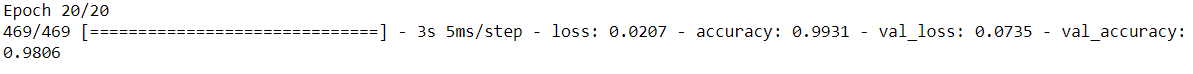

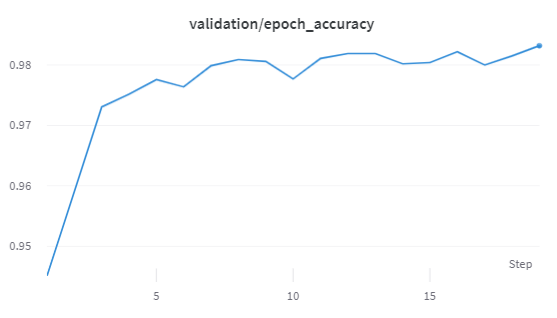

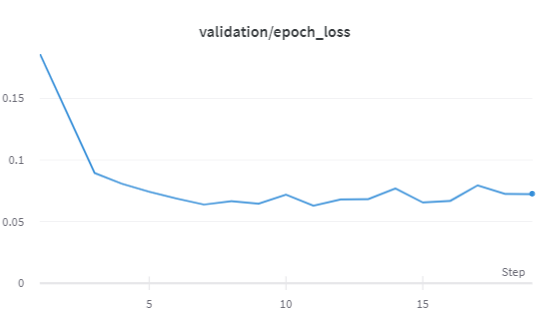

### Glorot Normal

Glorot Normal Initializer is also known as Xavier Normal Initializer. It is similar to He initializer but it is used for tanh activation functions. It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.<br>
Arguments:
* seed: A Python integer. Used to seed the random generator.

In [ ]:
glorot_normal, run_dir = training(init_scheme='glorot_normal')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

glorot_normal.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

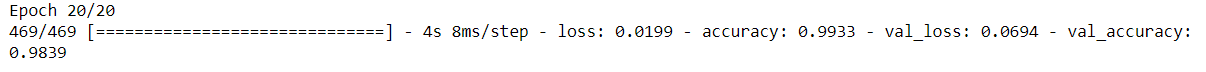

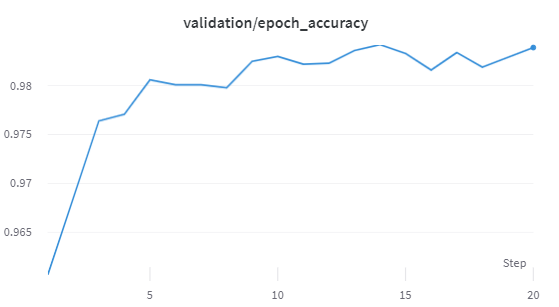

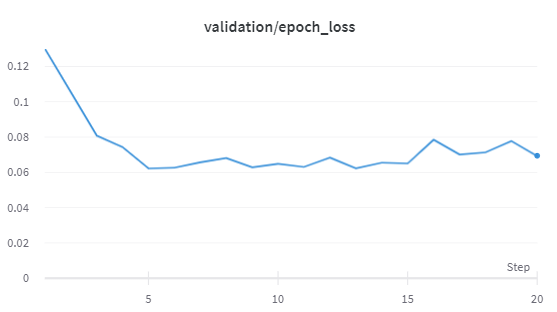

### Glorot Uniform 

Glorot Uniform Initializer is also known as Xavier Uniform Initializer. It is similar to He initializer but it is used for tanh activation functions. It draws samples from a uniform distribution within [-limit, limit] where limit is sqrt(6 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.<br>
Arguments:
* seed: A Python integer. Used to seed the random generator.

In [ ]:
glorot_uniform, run_dir = training(init_scheme='glorot_uniform')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

glorot_uniform.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

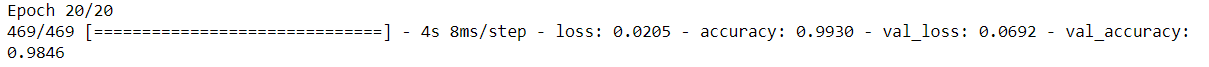

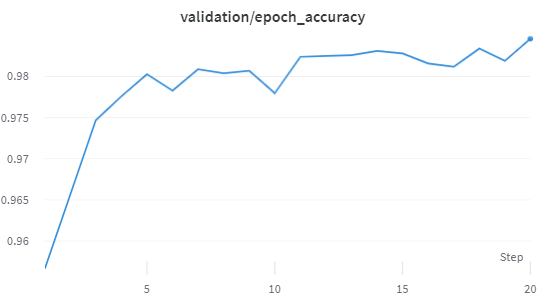

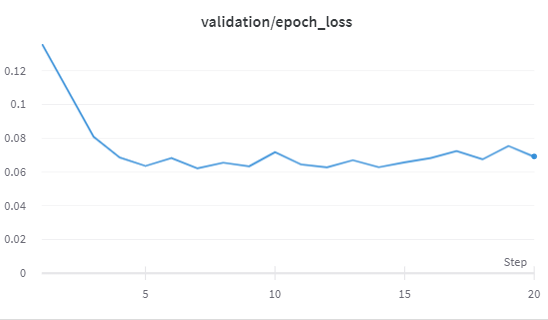

### He Normal 

In this method, we multiply the random initializations with stddev to get better results. It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.<br>
Arguments:
* seed: A Python integer. Used to seed the random generator.

In [ ]:
he_normal, run_dir = training(init_scheme='he_normal')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

he_normal.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

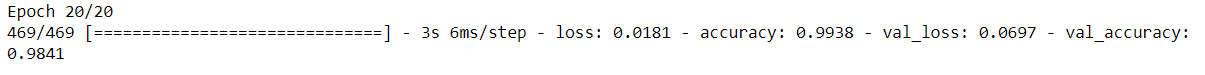

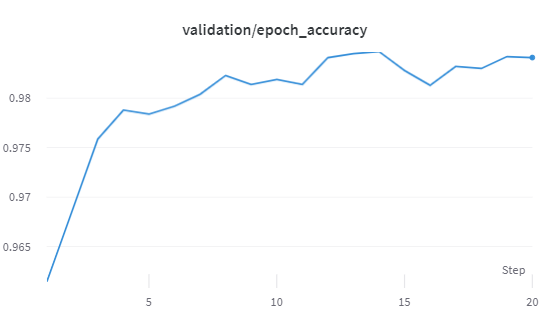

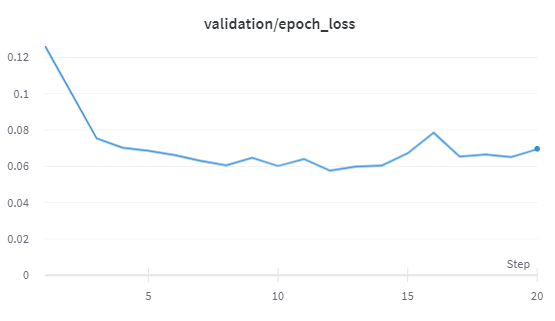

### He Uniform

In this method, it draws samples from a uniform distribution within [-limit, limit] where the limit is sqrt(6 / fan_in) where fan_in is the number of input units in the weight tensor.<br>
Arguments:
* seed: A Python integer. Used to seed the random generator.


In [ ]:
he_uniform, run_dir = training(init_scheme='he_uniform')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

he_uniform.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

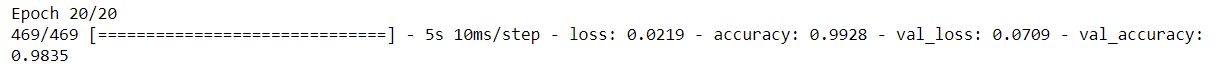

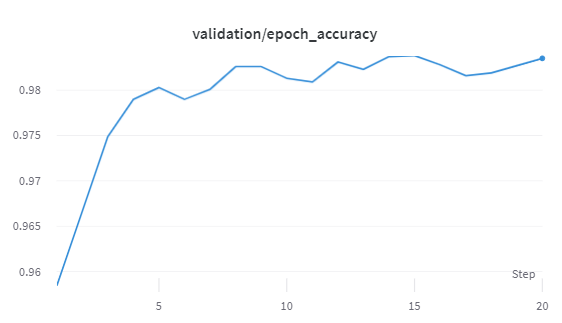

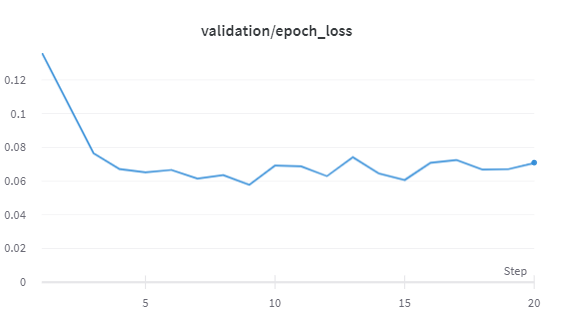

### LeCun Uniform

In this method, it draws samples from a uniform distribution within [-limit, limit] where the limit is sqrt(3 / fan_in) where fan_in is the number of input units in the weight tensor.<br>
Arguments:
* seed: A Python integer. Used to seed the random generator.

In [ ]:
lecun_uniform, run_dir = training(init_scheme='lecun_uniform')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

lecun_uniform.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

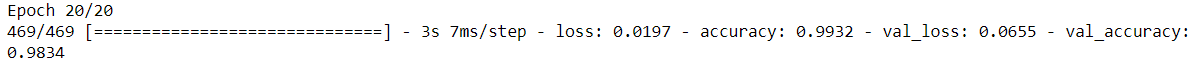

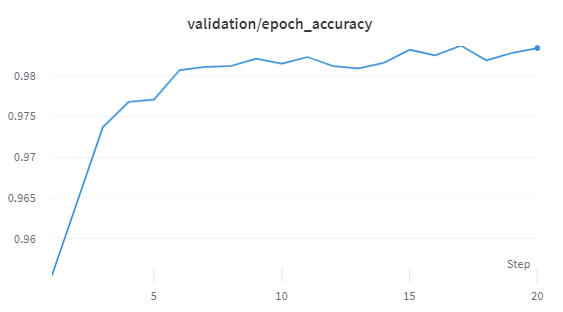

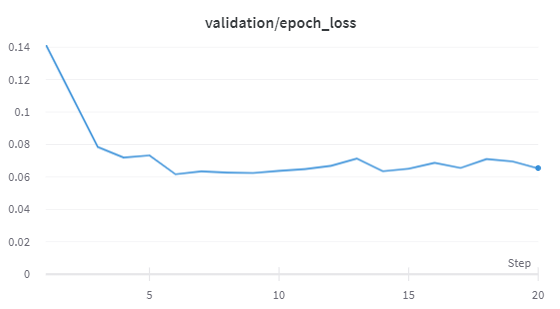

### LeCun Normal

In this method, it draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(1 / fan_in) where fan_in is the number of input units in the weight tensor.<br>
Arguments:
* seed: A Python integer. Used to seed the random generator.


In [ ]:
lecun_normal, run_dir = training(init_scheme='lecun_normal')

tb_callback = tf.keras.callbacks.TensorBoard(log_dir=run_dir, histogram_freq=4, write_images=True)

lecun_normal.fit(X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, batch_size=128,
    callbacks=[WandbCallback(data_type='image', labels=CLASS_NAMES, 
                             validation_data=(X_test, y_test)),
               tb_callback])

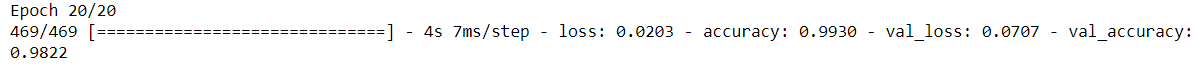

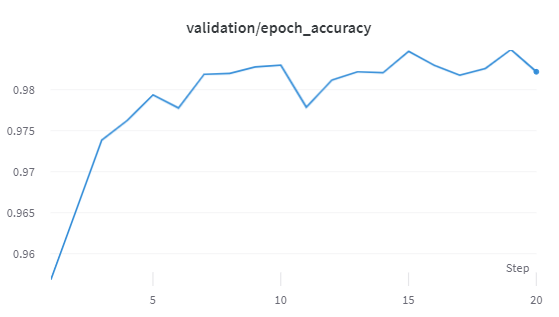

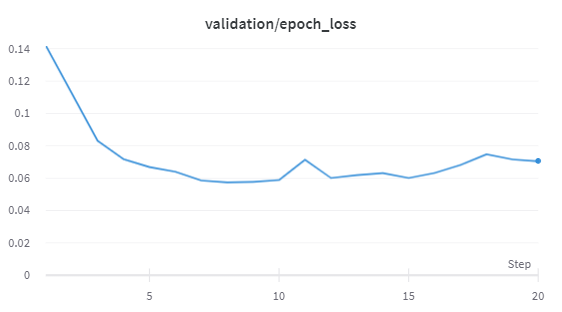

**Conclusion**

The weight initialization methods such as He, Glorot, LeCun and are much better than some of the weight initialization methods discussed at the start. Although, the random normal and random uniform initializers have good accuracy they are not reproducible and are the source of vanishing gradient and exploding gradient problems. Some of the new techniques discussed at the end set weights neither too much bigger than 1 nor too much less than 1. Adding to it, the time taken for convergence is also less. Hence, we can conclude that all the initializers have their own significance but the objective of avoiding slow convergence remains the same for all but only a few are able to achieve it.

**References**

https://www.tensorflow.org/api_docs/python/tf/keras/initializers

I have written a blog on it as well: https://medium.com/guidona-softpedia/weight-initialization-methods-in-neural-networks-a3e7a793cee5